In [1]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers.experimental import preprocessing

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

--2021-07-27 21:08:10--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2021-07-27 21:08:10 (4.52 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
label_encoder = LabelEncoder()

dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])


In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [7]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)


In [8]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [24]:
model = tf.keras.Sequential([
    
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.predict(train_dataset)

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mae', 'mse'])

In [25]:
history = model.fit(
    train_dataset, train_labels, 
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
27/27 - 1s - loss: 9435.9219 - mae: 9435.9219 - mse: 200984496.0000 - val_loss: 6533.1191 - val_mae: 6533.1191 - val_mse: 142298416.0000
Epoch 2/100
27/27 - 0s - loss: 7172.5156 - mae: 7172.5156 - mse: 165053040.0000 - val_loss: 5575.9170 - val_mae: 5575.9170 - val_mse: 128167016.0000
Epoch 3/100
27/27 - 0s - loss: 6539.3799 - mae: 6539.3799 - mse: 156006768.0000 - val_loss: 5678.1411 - val_mae: 5678.1411 - val_mse: 101363232.0000
Epoch 4/100
27/27 - 0s - loss: 5857.5923 - mae: 5857.5923 - mse: 125684912.0000 - val_loss: 3793.1560 - val_mae: 3793.1560 - val_mse: 67960928.0000
Epoch 5/100
27/27 - 0s - loss: 5203.2612 - mae: 5203.2612 - mse: 70921384.0000 - val_loss: 4267.1353 - val_mae: 4267.1353 - val_mse: 35175384.0000
Epoch 6/100
27/27 - 0s - loss: 4502.2827 - mae: 4502.2827 - mse: 59615652.0000 - val_loss: 2987.3030 - val_mae: 2987.3030 - val_mse: 34657980.0000
Epoch 7/100
27/27 - 0s - loss: 3984.4929 - mae: 3984.4929 - mse: 49383544.0000 - val_loss: 4375.5635 - val_mae:

In [26]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.fit(train_dataset, train_labels, callbacks=[es_callback])

34/34 [==============================] - 0s 2ms/step - loss: 2583.7881 - mae: 2583.7881 - mse: 28010028.0000


9/9 - 0s - loss: 2823.1973 - mae: 2823.1973 - mse: 36516128.0000
Testing set Mean Abs Error: 2823.20 expenses
You passed the challenge. Great job!


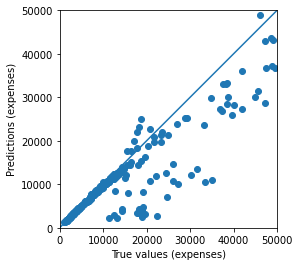

In [27]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)